In [37]:
import pandas as pd
import numpy as np
from geopy.distance import distance
from matplotlib import pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('../../../phantom_rides.csv')

In [11]:
df.head(5)

,bike_id,end_station_id,end_lat,end_lon,next_station,next_lat,next_lon
0,14611,514,40.760875,-74.002777,2010,40.721655,-74.002347
1,14611,486,40.746201,-73.988557,484,40.755003,-73.980144
2,14611,537,40.740259,-73.984092,237,40.730473,-73.986724
3,14611,365,40.682232,-73.961458,310,40.689269,-73.989129
4,14611,137,40.761628,-73.972924,420,40.687645,-73.969689


In [22]:
df['distance'] = df.apply(lambda x: distance((x['end_lat'], x['end_lon']), (x['next_lat'], x['next_lon'])).miles, axis = 1)

In [24]:
df['manhattan_distance'] = df.apply(lambda x: 
distance((x['end_lat'], x['end_lon']), (x['end_lat'], x['next_lon'])).miles + 
distance((x['next_lat'], x['next_lon']), (x['end_lat'], x['next_lon'])).miles, axis = 1)

In [32]:
df = df[df['distance'] < 50]

In [33]:
df['distance'].sort_values()

439566      0.004398
3957238     0.004398
3958405     0.004398
3945624     0.004398
332176      0.004398
             ...    
709341     13.424296
838712     13.424296
1297099    13.424296
901504     13.658148
572490     13.744706
Name: distance, Length: 4690150, dtype: float64

(array([9.52793e+05, 1.04284e+06, 7.17609e+05, 5.26644e+05, 3.67450e+05,
        2.60280e+05, 2.03972e+05, 1.49136e+05, 1.15272e+05, 9.08540e+04,
        7.03060e+04, 5.31490e+04, 3.81340e+04, 2.86770e+04, 2.17080e+04,
        1.61350e+04, 1.28450e+04, 7.56900e+03, 5.69100e+03, 3.47300e+03,
        2.36100e+03, 1.22600e+03, 6.64000e+02, 5.14000e+02, 2.46000e+02,
        2.31000e+02, 1.66000e+02, 1.56000e+02, 3.30000e+01, 1.60000e+01]),
 array([4.39807948e-03, 4.62408338e-01, 9.20418596e-01, 1.37842885e+00,
        1.83643911e+00, 2.29444937e+00, 2.75245963e+00, 3.21046989e+00,
        3.66848015e+00, 4.12649040e+00, 4.58450066e+00, 5.04251092e+00,
        5.50052118e+00, 5.95853144e+00, 6.41654169e+00, 6.87455195e+00,
        7.33256221e+00, 7.79057247e+00, 8.24858273e+00, 8.70659299e+00,
        9.16460324e+00, 9.62261350e+00, 1.00806238e+01, 1.05386340e+01,
        1.09966443e+01, 1.14546545e+01, 1.19126648e+01, 1.23706751e+01,
        1.28286853e+01, 1.32866956e+01, 1.37447058e+01])

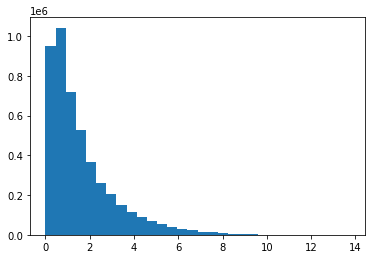

In [35]:
plt.hist(df['distance'], bins = 30)

(array([9.485770e+05, 1.042369e+06, 7.246990e+05, 5.171420e+05,
        3.736390e+05, 2.687980e+05, 1.980500e+05, 1.570480e+05,
        1.200340e+05, 9.488700e+04, 7.415700e+04, 5.146200e+04,
        3.574000e+04, 2.756700e+04, 2.004200e+04, 1.300300e+04,
        8.308000e+03, 5.339000e+03, 3.552000e+03, 2.186000e+03,
        1.290000e+03, 7.470000e+02, 4.640000e+02, 4.630000e+02,
        1.840000e+02, 1.270000e+02, 1.190000e+02, 1.080000e+02,
        3.800000e+01, 1.100000e+01]),
 array([6.21976180e-03, 5.86686102e-01, 1.16715244e+00, 1.74761878e+00,
        2.32808512e+00, 2.90855146e+00, 3.48901780e+00, 4.06948414e+00,
        4.64995048e+00, 5.23041682e+00, 5.81088316e+00, 6.39134950e+00,
        6.97181584e+00, 7.55228218e+00, 8.13274852e+00, 8.71321486e+00,
        9.29368120e+00, 9.87414754e+00, 1.04546139e+01, 1.10350802e+01,
        1.16155466e+01, 1.21960129e+01, 1.27764792e+01, 1.33569456e+01,
        1.39374119e+01, 1.45178783e+01, 1.50983446e+01, 1.56788109e+01,
        1.

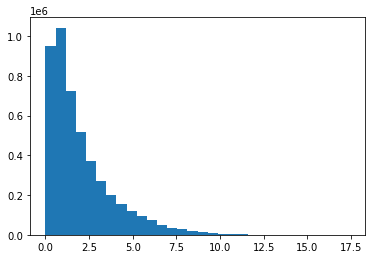

In [36]:
plt.hist(df['manhattan_distance'], bins = 30)

<AxesSubplot:xlabel='distance', ylabel='Density'>

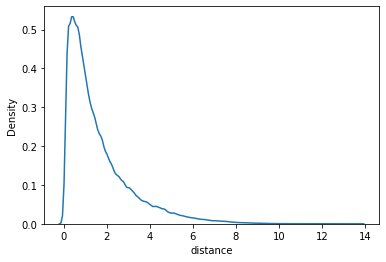

In [38]:
sns.kdeplot(df['distance'])

<AxesSubplot:xlabel='manhattan_distance', ylabel='Density'>

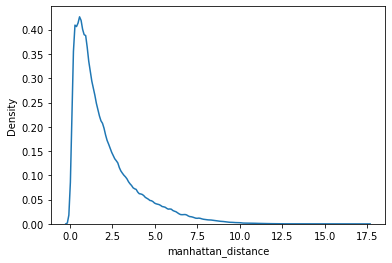

In [39]:
sns.kdeplot(df['manhattan_distance'])